# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
We have data of 110527 patients from brazil that went or didn’t went to the appointment we have information about the patient illness (Hypertension,Diabetes,Alcoholism,Handicap,No Show,SMS_received), Also the age and gender of the patients with their Neighborhood I will try to see if there is any relationship between each variable weather they affect the patients will go to the appointment or not

- there are 3 illness (Hypertension)(Diabetes)(Alcoholism)
  - Hypertension (HTN or HT), also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated. High blood pressure typically does not cause symptoms. Long-term high blood pressure, however, is a major risk factor for coronary artery disease, stroke, heart failure, atrial fibrillation, peripheral arterial disease, vision loss, chronic kidney disease, and dementia
  -  Diabetes is a disease in which your blood glucose, or blood sugar, levels are too high. Glucose comes from the foods you eat. Insulin is a hormone that helps the glucose get into your cells to give them energy. With type 1 diabetes, your body does not make insulin. With type 2 diabetes, the more common type, your body does not make or use insulin well. Without enough insulin, the glucose stays in your blood. You can also have prediabetes. This means that your blood sugar is higher than normal but not high enough to be called diabetes. Having prediabetes puts you at a higher risk of getting type 2 diabetes.
  -  Alcoholism is, broadly, any drinking of alcohol that results in significant mental or physical health problems Alcoholism is not a recognized diagnostic entity. Predominant diagostic classifications are alcohol use disorder(DSM-5) or alcohol dependence

In [115]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
- first i will start with accessing the data

In [116]:
#here i load the csv into panda datafram 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [117]:
#here i start to show few lines
df.head(100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.986249e+14,5640307,M,2016-04-29T10:28:54Z,2016-04-29T00:00:00Z,1,BONFIM,0,0,0,0,0,0,No
96,7.937625e+13,5623692,M,2016-04-26T14:28:39Z,2016-04-29T00:00:00Z,3,BONFIM,0,0,0,0,0,1,No
97,5.253342e+12,5565493,F,2016-04-11T09:00:00Z,2016-04-29T00:00:00Z,35,BONFIM,0,0,0,0,0,1,No
98,3.725964e+14,5571906,F,2016-04-12T09:44:42Z,2016-04-29T00:00:00Z,51,BONFIM,0,0,0,0,0,1,No


In [118]:
#info function show if there null value, types of data , columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [119]:
df.shape

(110527, 14)

In [120]:
#here i tried to see if there is any patients his age is under 0
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [121]:
#here i tried to see if there is any patients his age is under 1

df.query('Age < 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [122]:
# see if there is any duplicated
sum(df.duplicated())

0

In [123]:
df.drop(df[df['Age'] < 1].index, inplace = True) 

In [124]:
#test if still any patients his age under 1
df.query('Age < 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Data Cleaning 
- drop age less than 1
- fix data types
- fix columns names 


In [125]:
# fix columns names
df = df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap' : 'Handicap','No-show' : 'NoShow'})

In [126]:
df.sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
109079,6.922379e+13,5703183,M,2016-05-16T13:36:44Z,2016-06-06T00:00:00Z,9,SANTO ANTÔNIO,0,0,0,0,0,1,No
6268,1.257286e+13,5648023,F,2016-05-02T14:54:21Z,2016-05-04T00:00:00Z,46,SANTA TEREZA,0,0,0,0,0,0,Yes
47917,7.975139e+13,5688085,M,2016-05-12T06:37:01Z,2016-05-16T00:00:00Z,45,SÃO BENEDITO,0,0,0,0,0,0,Yes


In [127]:
#fix data types
df.astype({'AppointmentID': 'str', 'PatientId' : 'str','ScheduledDay':'datetime64[ns]','AppointmentDay' : 'datetime64[ns]'}).dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
NoShow                    object
dtype: object

In [128]:
df['PatientId'] = df.PatientId.astype('str')
df['AppointmentID'] = df.AppointmentID.astype('str')
df['Gender'] = df.Gender.astype('object')
df['ScheduledDay'] = df.ScheduledDay.astype('datetime64[ns]')
df['AppointmentDay'] = df.AppointmentDay.astype('datetime64[ns]')
df['NoShow'] = df.NoShow.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  object        
 1   AppointmentID   106987 non-null  object        
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  int64         
 8   Hypertension    106987 non-null  int64         
 9   Diabetes        106987 non-null  int64         
 10  Alcoholism      106987 non-null  int64         
 11  Handicap        106987 non-null  int64         
 12  SMS_received    106987 non-null  int64         
 13  NoShow          106987 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

In [129]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

In [130]:
# sum of handicap is 2240 around 2 percent
df.Handicap.value_counts()* 100 / 106987

0    97.906288
1     1.907708
2     0.171049
3     0.012151
4     0.002804
Name: Handicap, dtype: float64

In [131]:
# only 10 % have Scholarship from all Patient which will affet how many time patient will go to the doctor 
# due to financial issue 
df.Scholarship.value_counts()* 100 / 106987

0    89.896903
1    10.103097
Name: Scholarship, dtype: float64

In [132]:
# 7.4 % of patients have Diabetes
(df.Diabetes.value_counts())* 100 / 106987

0    92.575734
1     7.424266
Name: Diabetes, dtype: float64

In [133]:
# around 3% of patients has Alcoholism
df.Alcoholism.value_counts()* 100 / 106987

0    96.859432
1     3.140568
Name: Alcoholism, dtype: float64

In [134]:
# around 20.5% of patients have Hypertension which show that the most sickness this paitents face according to our data 
(df.Hypertension.value_counts()* 100 / 106987)

0    79.622758
1    20.377242
Name: Hypertension, dtype: float64

In [135]:
# 32.3 % of all the sms reach the patients which may affect the number of paitent that will go to the doctor
df.SMS_received.value_counts()* 100 / 106987

0    67.673643
1    32.326357
Name: SMS_received, dtype: float64

In [136]:
# around one of each five persons dont go to his Appointment
df.NoShow.value_counts()* 100 / 106987

No     79.735856
Yes    20.264144
Name: NoShow, dtype: float64

In [137]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Relationship between gender and show or No show
- we can see that arount 57000 (79%) of female go the the Appointment vs arount 15000 (21%)
- as for male around 31000 (80%) go to the doctor vs 7500 (20%) dont go to the Appointment
- so the male and female very close doesnt make a different if the Appointment made by female or male (male just 1% more than female)

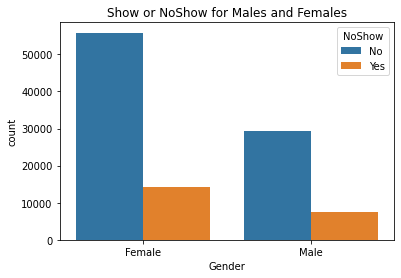

In [138]:
ax = sns.countplot(x=df.Gender,hue=df.NoShow,data=df)
ax.set_title('Show or NoShow for Males and Females')
x_ticks_labels = ['Female','Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [139]:
# her we can see that the most patents came from those five Neighbourhood 
#[JARDIM CAMBURI,MARIA ORTIZ,RESISTÊNCIA,JARDIM DA PENHA,ITARARÉ]
(df.Neighbourhood.value_counts())*100/106987

JARDIM CAMBURI                 7.090581
MARIA ORTIZ                    5.199697
RESISTÊNCIA                    3.958425
JARDIM DA PENHA                3.599503
ITARARÉ                        3.189173
                                 ...   
ILHA DO BOI                    0.032714
ILHA DO FRADE                  0.009347
AEROPORTO                      0.007478
ILHAS OCEÂNICAS DE TRINDADE    0.001869
PARQUE INDUSTRIAL              0.000935
Name: Neighbourhood, Length: 81, dtype: float64

In [140]:
# we have 81 Neighbourhood
df.Neighbourhood.nunique()

81

Text(0.5, 1.0, 'Number of Patients in each Neighbourhood')

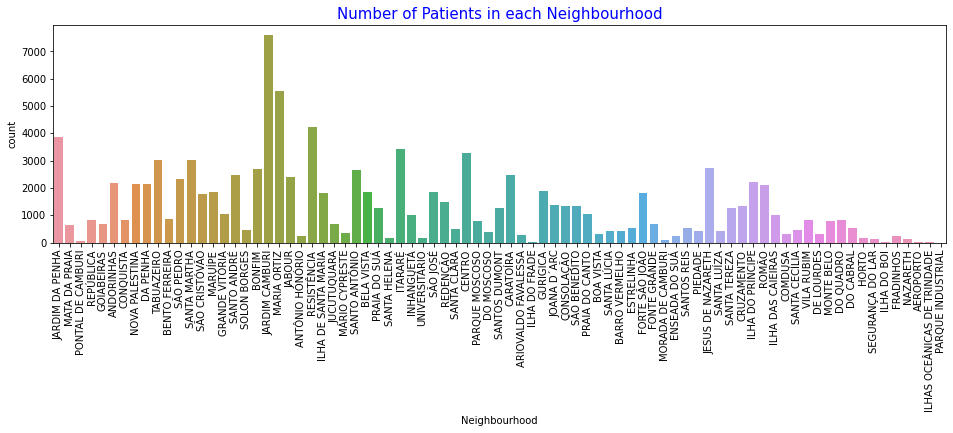

In [141]:
# highest Neighbourhood with patents numbers[JARDIM CAMBURI,MARIA ORTIZ,RESISTÊNCIA,JARDIM DA PENHA,ITARARÉ]
plt.figure(figsize=(16,4))
plt.xticks(rotation= 90)
sns.countplot(df.Neighbourhood)
plt.title('Number of Patients in each Neighbourhood',color = 'blue',fontsize=15)

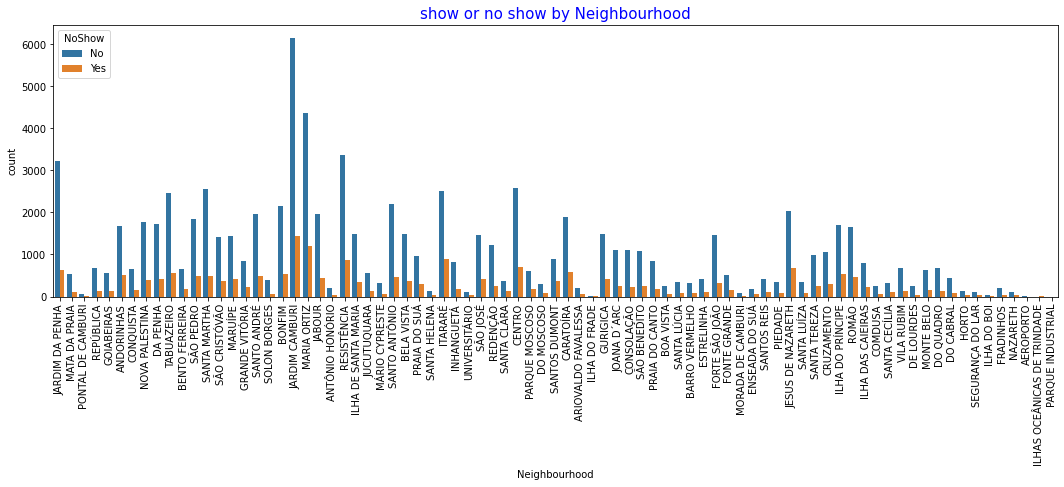

In [142]:
# we cannt tell if there is different yet
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax =sns.countplot(x=df.Neighbourhood,hue=df.NoShow)
ax.set_title('show or no show by Neighbourhood',color = 'blue',fontsize=15)
plt.show()

In [143]:
# use ratio to see if there is any different or relationship
Neighbourhood_ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()


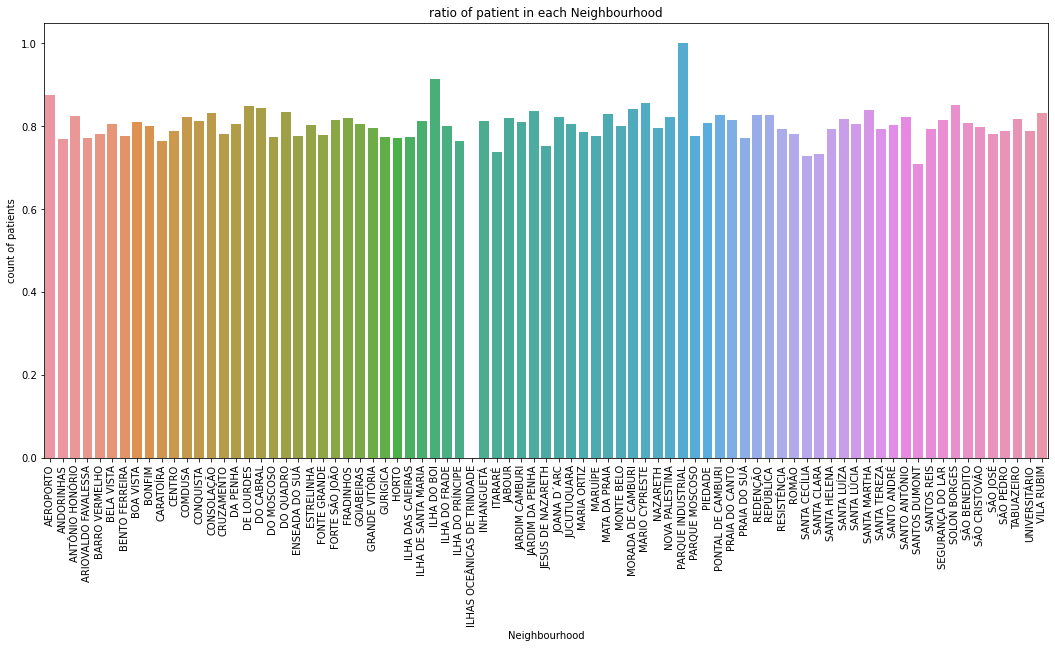

In [144]:
# we can see here that highest Neighbourhood show up at the appointment
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
ax=sns.barplot(x=Neighbourhood_ratio.index,y=Neighbourhood_ratio)
ax.set_title('ratio of patient in each Neighbourhood' )
ax.set_ylabel('count of patients')
ax.set_xlabel('Neighbourhood')
plt.show()

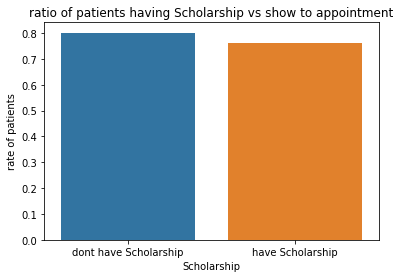

In [145]:
# dont have Scholarship more likely to go to the appointment
Scholarship_ratio = df[df.NoShow=='No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=Scholarship_ratio.index,y=Scholarship_ratio)
ax.set_title('ratio of patients having Scholarship vs show to appointment')
x_ticks_labels = ['dont have Scholarship','have Scholarship']
ax.set_xticklabels(x_ticks_labels)
ax.set_ylabel('rate of patients')
plt.show()

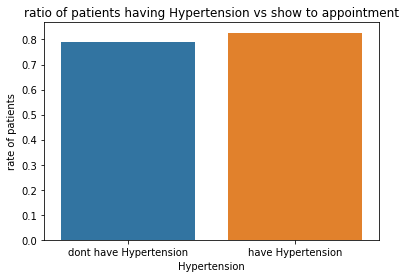

In [146]:
# if patients have Hypertension more like to go to the appointment
Hypertension_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
ax= sns.barplot(x=Hypertension_ratio.index,y=Hypertension_ratio)
ax.set_title('ratio of patients having Hypertension vs show to appointment')
x_ticks_labels = ['dont have Hypertension', 'have Hypertension']
ax.set_xticklabels(x_ticks_labels)
ax.set_ylabel('rate of patients')
plt.show()

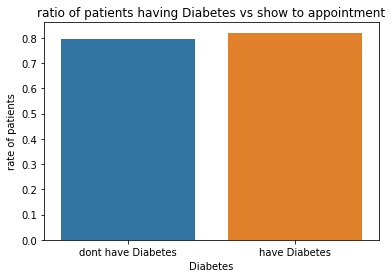

In [147]:
# if patients have Diabetes more like to go to the appointment
Diabetes_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax= sns.barplot(x=Diabetes_ratio.index,y=Diabetes_ratio)
ax.set_title('ratio of patients having Diabetes vs show to appointment')
x_ticks_labels = ['dont have Diabetes', 'have Diabetes']
ax.set_xticklabels(x_ticks_labels)
ax.set_ylabel('rate of patients')

plt.show()

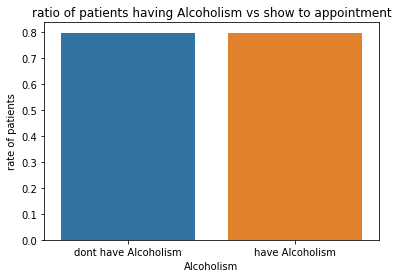

In [148]:
# if patients have Alcoholism it makes no different to go or not to the AppointmentDay
Alcoholism_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax= sns.barplot(x=Alcoholism_ratio.index,y=Alcoholism_ratio)
ax.set_title('ratio of patients having Alcoholism vs show to appointment')
x_ticks_labels = ['dont have Alcoholism', 'have Alcoholism']
ax.set_xticklabels(x_ticks_labels)
ax.set_ylabel('rate of patients')

plt.show()

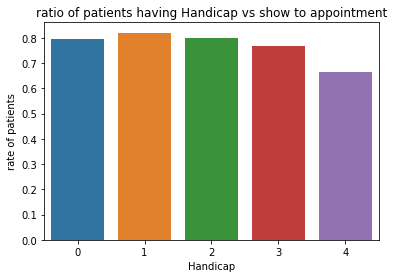

In [149]:
# as per the below figure we can see that if the patient is handicapped and need help to go to the doctor is more likely to missed it especially if he is degree 3 or more means need more helpHandicap_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
Handicap_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax= sns.barplot(x=Handicap_ratio.index,y=Handicap_ratio)
ax.set_title('ratio of patients having Handicap vs show to appointment')
ax.set_ylabel('rate of patients')

plt.show()

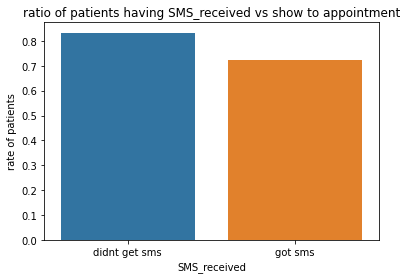

In [150]:
# more pateints didnt got sms went however to the AppointmentDay than who didnt 
SMS_received_ratio = df[df.NoShow == 'No'].groupby(['SMS_received']).size()/df.groupby(['SMS_received']).size()
ax= sns.barplot(x=SMS_received_ratio.index,y=SMS_received_ratio)
ax.set_title('ratio of patients having SMS_received vs show to appointment')
x_ticks_labels = ['didnt get sms', 'got sms']
ax.set_xticklabels(x_ticks_labels)
ax.set_ylabel('rate of patients')

plt.show()

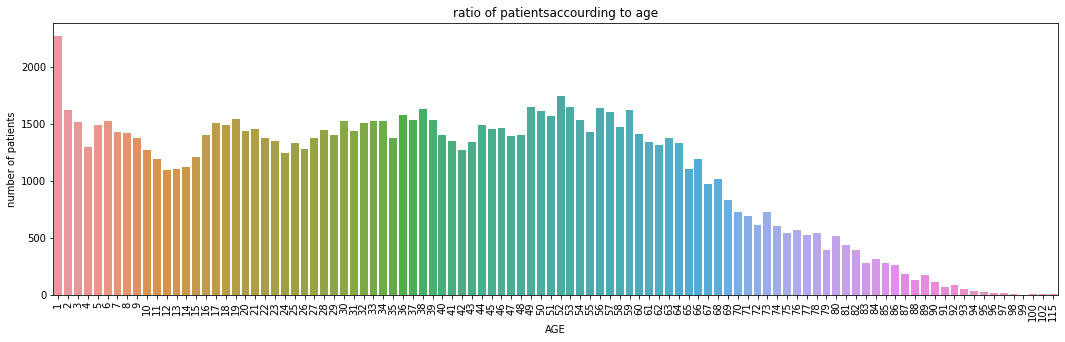

In [151]:
df_age = df.Age.value_counts()
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax= sns.barplot(x=df_age.index,y=df_age)
ax.set_title('ratio of patientsaccourding to age')
ax.set_xlabel('AGE')
ax.set_ylabel('number of patients')

plt.show()

In [152]:
df.Age.mean()

38.31608513183845

In [153]:
df.Age.std()

22.46621433909935

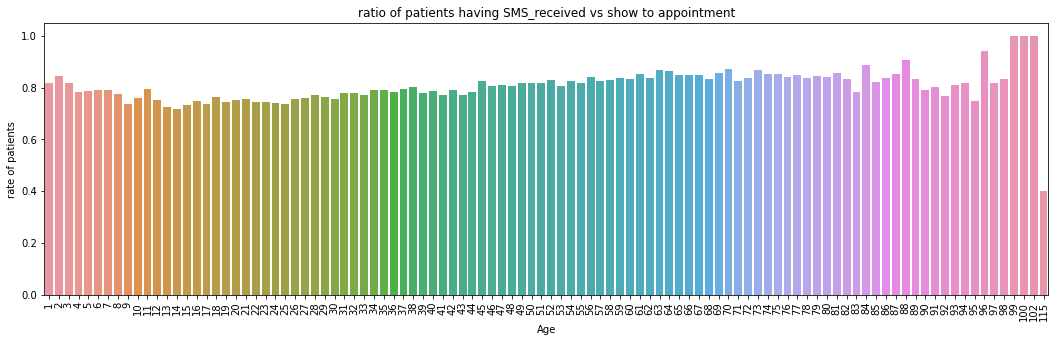

In [154]:
# here we can see that patients from 1 to 5 and patient over 40 are more likely will not miss the appointment
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax= sns.barplot(x=df_age_ratio.index,y=df_age_ratio)
ax.set_title('ratio of patients having SMS_received vs show to appointment')
ax.set_ylabel('rate of patients')

plt.show()

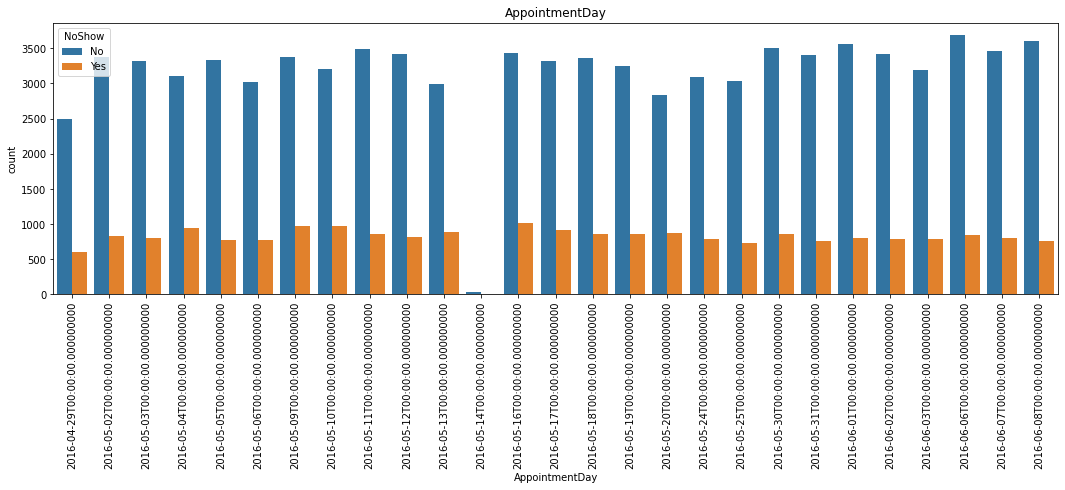

In [155]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.AppointmentDay,hue=df.NoShow,data=df)
ax.set_title('AppointmentDay')
plt.show()

In [156]:
df.AppointmentDay.nunique()

27

In [157]:
df.ScheduledDay.nunique()

100307

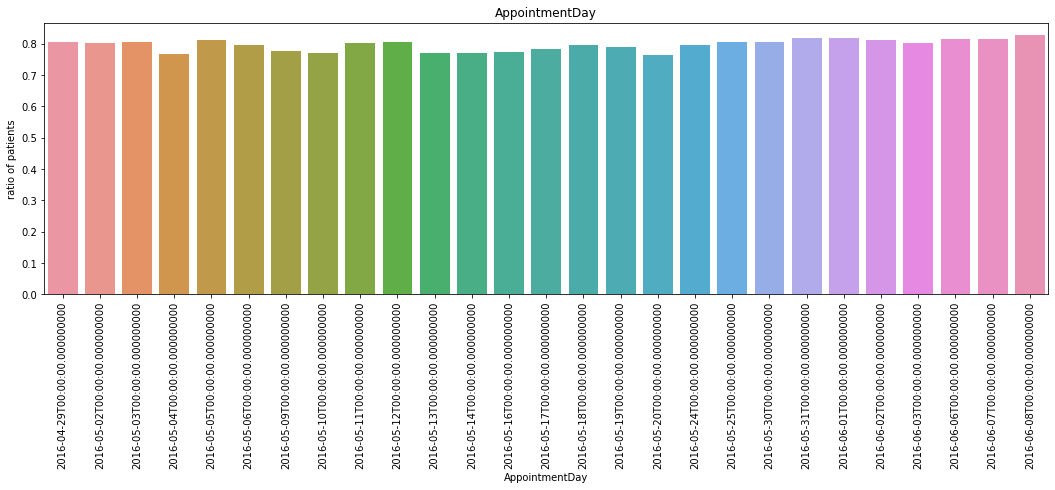

In [158]:
AppointmentDay = df[df.NoShow == 'No'].groupby(['AppointmentDay']).size()/df.groupby(['AppointmentDay']).size()
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax= sns.barplot(x=AppointmentDay.index,y=AppointmentDay)
ax.set_title('AppointmentDay')
ax.set_ylabel('ratio of patients')

plt.show()

Text(0.5, 1.0, 'Number of female and male patients')

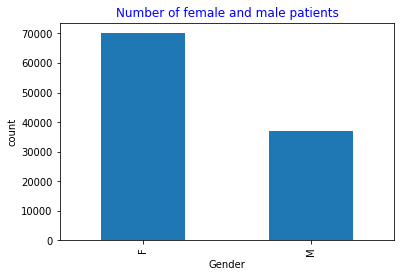

In [159]:
# here we can see that the number of women is much greater than men 
df.groupby(['Gender'])['PatientId'].count().plot(kind='bar').set_ylabel('count')
df.groupby(['Gender'])[['PatientId']].count()
plt.title('Number of female and male patients',color = 'Blue')

,mean,std
Gender,,
F,39.849183,21.560250
M,35.400418,23.824998


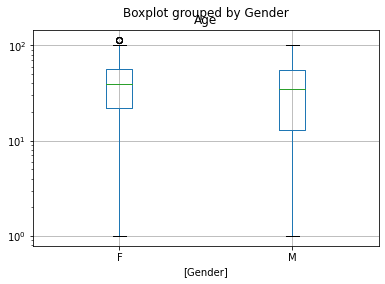

In [160]:
#we can see here that the mean age of female is higer then man around 40 vs 35 for man 
# standard deviation for age of frmale is less than men 22 vs 24 
df.boxplot(column=['Age'],by=['Gender']).set_yscale('log')
pd.DataFrame(df.groupby(['Gender'])['Age'].describe().loc[:,['mean','std']])

Text(0.5, 1.0, 'rate of pateints that have Alcoholism')

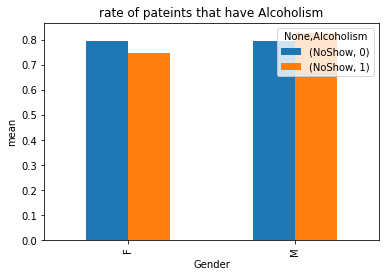

In [161]:
# here we can see that the rate of men with alcoholism higher than female 85 vs 75 for female
df['NoShow']=pd.get_dummies(df['NoShow'])
df.groupby(['Gender','Alcoholism'])[['NoShow']].mean().unstack().plot(kind='bar').set_ylabel('mean')
plt.title("rate of pateints that have Alcoholism")

Text(0.5, 1.0, 'Mean of each gender who have or havent Diabetes')

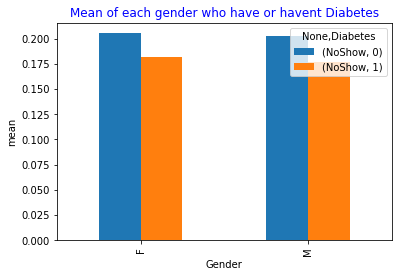

In [162]:
# here we can see that the rate of men with Diabetes is equal to female

df['NoShow']=pd.get_dummies(df['NoShow'])
df.groupby(['Gender','Diabetes'])[['NoShow']].mean().unstack().plot(kind='bar').set_ylabel('mean')
plt.title('Mean of each gender who have or havent Diabetes',color='Blue')

Text(0.5, 1.0, 'Mean of each gender who have or havent Hypertension')

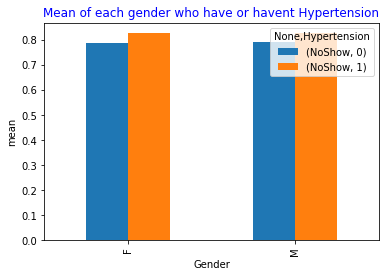

In [163]:
# here we can see that the rate of men with Hypertension is equal to female
df['NoShow']=pd.get_dummies(df['NoShow'])
df.groupby(['Gender','Hypertension'])[['NoShow']].mean().unstack().plot(kind='bar').set_ylabel('mean')
plt.title('Mean of each gender who have or havent Hypertension',color='Blue')

Text(0.5, 1.0, 'Age of patients')

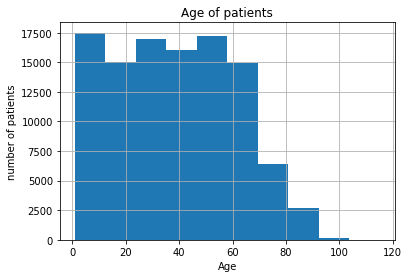

In [164]:
# here we show the number of patients from each age 
df.Age.hist()
plt.ylabel('number of patients')
plt.xlabel('Age')
plt.title('Age of patients')

### Research Question:

 - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

* Some info. About dataset
  - 2% handicap - 10% have scholarship - 7.4% have diabetes - 3% have alcoholism - 20.4% have hypertension - 79.7% go to their appointment - The Mean age for female 40 , for male 35


<a id='conclusions'></a>
## Conclusions

*  After analysis the data: 
* i tries to see very realtionship between al the points as much as possible
   - Man 1% more likely to go their appointment 
   - Top Neighborhood [JARDIM CAMBURI,MARIA ORTIZ,RESISTÊNCIA,JARDIM DA PENHA,ITARARÉ] 
   - Patients from this Neighborhood have higher ratio to go to their appointment (Parquet industical ,Ilha do boi,Aeroporto) 
   - Don’t have Scholarship more like to go to their appointment in the same time the patients who have Scholarship 10% from all the patients 
   - Have hypertension, Diabetes more likely to go their appointment
   - Alcoholism don’t show a different 
   - Patients from age 1 to 5 and over 44 more likely to go to the appointment 
   - Handicap more likely to miss the appointment specially if the patient handicap with rating 2,3,4
   - the rate of men with alcoholism higher than female 85 vs 75 for female
   - the rate of men with Diabetes is equal to female
   - the rate of men with Hypertension is equal to female

- we have 1105527 patients with info about age illness, age, gender
- there is some issue in the data like age there was patients recoreded as their age is 0 and -1,it is sample of the data the more data we have and more accurate will give as better results

In [165]:
# as we can see man have higher name of Alcoholism than female
df.groupby(['Gender','Alcoholism'])[['NoShow']].sum()

NoShow
Gender Alcoholism         
F      0           54928.0
       1             915.0
M      0           27696.0
       1            1768.0

Text(0.5, 1.0, 'count of female and male that have Alcoholism')

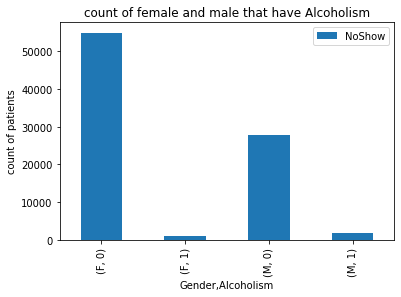

In [180]:
#here we can see the number of patients male or female that have or have not Alcoholism
df.groupby(['Gender','Alcoholism'])[['NoShow']].sum().plot(kind='bar')
plt.ylabel('count of patients')
plt.title('count of female and male that have Alcoholism')


- we can see below that female have Hypertension 18.6% vs male 15%

In [183]:
df.groupby(['Gender','Hypertension'])[['NoShow']].sum()

NoShow
Gender Hypertension         
F      0             43161.0
       1             12682.0
M      0             24117.0
       1              5347.0

Text(0, 0.5, 'count of patients')

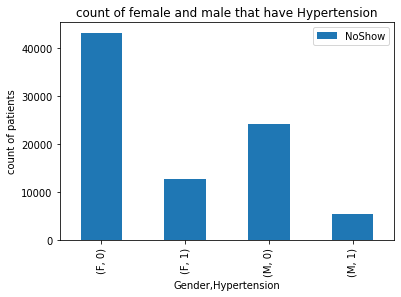

In [181]:
df.groupby(['Gender','Hypertension'])[['NoShow']].sum().plot(kind='bar')
plt.title('count of female and male that have Hypertension')
plt.ylabel('count of patients')

-  female percentage is 7.12% have Diabetes,men percentage 5.57%

- here we can see the number of female vs male who have Diabetes

In [188]:
df.groupby(['Gender','Diabetes'])[['NoShow']].sum()

NoShow
Gender Diabetes         
F      0         51254.0
       1          4589.0
M      0         27540.0
       1          1924.0

Text(0, 0.5, 'count of patients')

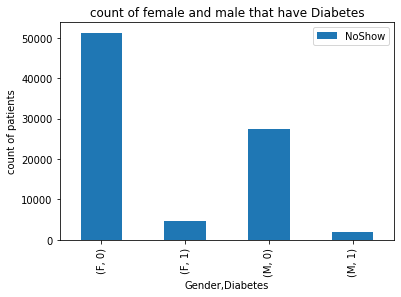

In [184]:
df.groupby(['Gender','Diabetes'])[['NoShow']].sum().plot(kind='bar')
plt.title('count of female and male that have Diabetes')
plt.ylabel('count of patients')

- here we can see the number of handicap female and male in every level

In [171]:
(df.groupby(['Gender','Handicap'])[['NoShow']].sum())

NoShow
Gender Handicap         
F      0         54797.0
       1           963.0
       2            80.0
       3             3.0
       4             0.0
M      0         28677.0
       1           712.0
       2            66.0
       3             7.0
       4             2.0

Text(0, 0.5, 'count of patients')

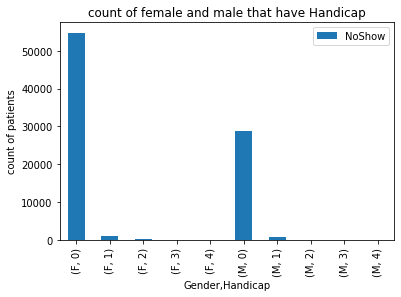

In [187]:
df.groupby(['Gender','Handicap'])[['NoShow']].sum().plot(kind='bar')
plt.title('count of female and male that have Handicap')
plt.ylabel('count of patients')

- female percentage 17.27% have Scholarship vs man 6.3%
- below we can see the number of female and male who have Scholarship

In [185]:
df.groupby(['Gender','Scholarship'])[['NoShow']].sum()

NoShow
Gender Scholarship         
F      0            49120.0
       1             6723.0
M      0            27949.0
       1             1515.0

Text(0, 0.5, 'count of patients')

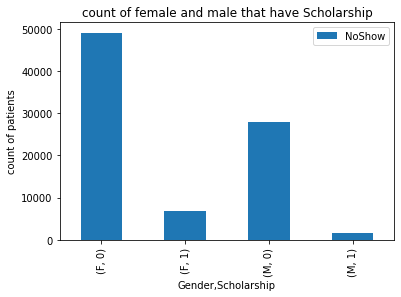

In [186]:
df.groupby(['Gender','Scholarship'])[['NoShow']].sum().plot(kind='bar')
plt.title('count of female and male that have Scholarship')
plt.ylabel('count of patients')